In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
plt.style.use("fivethirtyeight")
import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller,acf, pacf
import random

plt.rcParams["figure.figsize"] = (20, 8)

In [2]:
def parser(x):
    return datetime.datetime.strptime(x, '%d/%m/%y')
 
df = pd.read_csv("/home/parth/Downloads/slc_106.csv", parse_dates=[0],squeeze=True, date_parser = parser)
df.head()

,Date,V RY (Volt),V YB (Volt),V BR (Volt),Cumulative KiloWatt Hrs (kWh),IR (Amp),IY (Amp),IB (Amp),Power (Kilowatt),Mode,...,Run Hours (Hrs),R_Bulb Failure (nos),Y_Bulb Failure (nos),B_Bulb Failure (nos),Feeder,MCB,L-R,Door,CONTACTOR FEEDBACK ERROR,Power
0,2020-06-16,228.62,240.39,231.59,5221.1,0.08,0.0,0.00,0.0,Astro Clock,...,5.44,0.0,0.0,0.0,OFF,Normal,Remote,CLOSE,Normal,Normal
1,2020-06-16,231.36,246.41,233.51,5221.1,0.08,0.0,0.00,0.0,Astro Clock,...,5.44,0.0,0.0,0.0,OFF,Normal,Remote,CLOSE,Normal,Normal
2,2020-06-16,228.33,248.58,235.11,5221.1,0.08,0.0,0.01,0.0,Astro Clock,...,5.44,0.0,0.0,0.0,OFF,Normal,Remote,CLOSE,Normal,Normal
3,2020-06-16,233.63,242.99,237.39,5221.1,0.08,0.0,0.00,0.0,Astro Clock,...,5.44,0.0,0.0,0.0,OFF,Normal,Remote,CLOSE,Normal,Normal
4,2020-06-16,223.87,226.77,216.73,5221.1,0.08,0.0,0.00,0.0,Astro Clock,...,5.44,0.0,0.0,0.0,OFF,Normal,Remote,CLOSE,Normal,Normal


In [3]:
df.Feeder.replace(('ON', 'OFF'), (1, 0), inplace=True)
df = df.drop('Power', axis=1)
df.shape

(8185, 21)

In [4]:
df.tail(20)

,Date,V RY (Volt),V YB (Volt),V BR (Volt),Cumulative KiloWatt Hrs (kWh),IR (Amp),IY (Amp),IB (Amp),Power (Kilowatt),Mode,...,Frequncy (Hz),Run Hours (Hrs),R_Bulb Failure (nos),Y_Bulb Failure (nos),B_Bulb Failure (nos),Feeder,MCB,L-R,Door,CONTACTOR FEEDBACK ERROR
8165,2019-09-01,214.66,252.79,246.75,4355.3,0.08,0.00,0.00,0.00,Astro Clock,...,50.05,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8166,2019-09-01,218.88,256.46,241.12,4355.3,0.08,0.00,0.00,0.00,Astro Clock,...,50.08,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8167,2019-09-01,216.94,253.80,240.39,4355.3,0.09,0.00,0.00,0.00,Astro Clock,...,50.05,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8168,2019-09-01,222.70,239.22,231.16,4355.3,0.10,0.00,0.01,0.00,Astro Clock,...,50.03,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8169,2019-09-01,221.76,238.97,231.64,4355.3,0.10,0.00,0.01,0.00,Astro Clock,...,50.04,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8170,2019-09-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,Astro Clock,...,0.00,0.00,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8171,2019-09-01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,Astro Clock,...,0.00,0.00,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8172,2019-09-01,231.67,248.98,237.78,4355.3,0.09,0.00,0.00,0.00,Astro Clock,...,50.01,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8173,2019-09-01,241.54,250.32,239.72,4355.3,0.09,0.00,0.00,0.00,Astro Clock,...,49.98,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal
8174,2019-09-01,242.61,241.87,243.27,4355.3,0.09,0.00,0.00,0.00,Astro Clock,...,50.05,5.59,0.0,0.0,NaN,0.0,Normal,Remote,CLOSE,Normal


In [5]:
df.rename(columns = {'Power (Kilowatt)' : 'Power', 'Run Hours (Hrs)' : 'Burn_hrs'}, inplace=True)

In [6]:
df.dtypes

Date                             datetime64[ns]
V RY (Volt)                             float64
V YB (Volt)                             float64
V BR (Volt)                             float64
Cumulative KiloWatt Hrs (kWh)           float64
IR (Amp)                                float64
IY (Amp)                                float64
IB (Amp)                                float64
Power                                   float64
Mode                                     object
Power Factor (PF)                       float64
Frequncy (Hz)                           float64
Burn_hrs                                float64
R_Bulb Failure (nos)                    float64
Y_Bulb Failure (nos)                    float64
B_Bulb Failure (nos)                    float64
Feeder                                  float64
MCB                                      object
L-R                                      object
Door                                     object
CONTACTOR FEEDBACK ERROR                

In [7]:
df['Power'].shape

(8185,)

In [8]:
df['Feeder'].where(df['Feeder'] == 0).count()

4566

In [9]:
df['Power'].where(df['Power'] == 0).count()

4594

In [10]:
df.drop(df[(df['Power'] != 0) & (df['Feeder'] == 0)].index, inplace = True)

In [11]:
df.shape

(8164, 21)

In [12]:
df = df[['Date' , 'Power' , 'Burn_hrs']]
df.dtypes

Date        datetime64[ns]
Power              float64
Burn_hrs           float64
dtype: object

In [13]:
def rolling_mean_plot(data, window):
    rolling_mean = data['Power'].rolling(window = window).mean()
    rolling_std = data['Power'].rolling(window = window).std()
    plt.figure(figsize=(20,10))
    plt.plot(rolling_mean)
    plt.plot(rolling_std)
    plt.xlabel('Date')
    plt.ylabel('Rolling mean Power in kW')
    plt.grid(True)
    return rolling_mean

In [14]:
df = df.dropna()
date = []
Power = []
burn_hrs = []
add = 0
counter = 0
x = df.Date[0]
date.append(df.Date[0])
for i in range(df.Date.shape[0]):
    if (df.Power.values[i] == 0):
        continue
    
    if (x != df.Date.values[i]):
        x = df.Date.values[i]
        date.append(df.Date.values[i])
        max_burn_hr = max(burn_hrs)
        add = add/counter
        Power.append(add*max_burn_hr)
        burn_hrs.clear()
        add = 0
        counter = 0
    
    add += df.Power.values[i]
    counter += 1
    burn_hrs.append(df.Burn_hrs.values[i])
    
    if(i == df.Date.shape[0]-1):
        max_burn_hr = max(burn_hrs)
        add = add/counter
        Power.append(add*max_burn_hr)
        break


In [15]:
Date = np.array(date)
Power = np.array(Power)
date = Date.reshape(-1,1)
Power = Power.reshape(-1,1)
d = np.concatenate((date, Power), axis=1)

In [16]:
df = pd.DataFrame(d, columns=['Date', 'Power'])
df = df.astype({"Power": float})

In [17]:
print(df.shape)
df = df[::-1]
df

(281, 2)


,Date,Power
280,2019-09-01,64.850800
279,2019-09-02,60.067103
278,2019-09-03,71.438706
277,2019-09-04,71.417025
276,2019-09-05,71.670787
...,...,...
4,2020-06-12,60.934616
3,2020-06-13,58.981050
2,2020-06-14,52.886895
1,2020-06-15,58.859833


In [18]:
print(df['Power'].isnull().values.any())
print(df['Power'].eq(0).any().any())

False
False


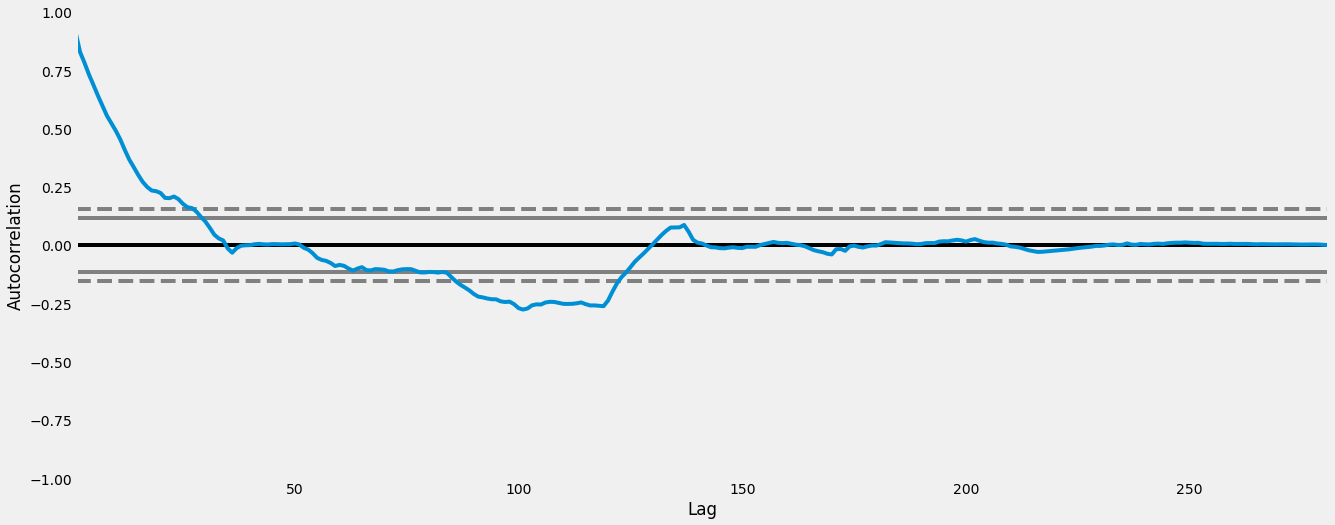

In [19]:
pd.plotting.autocorrelation_plot(df['Power'])

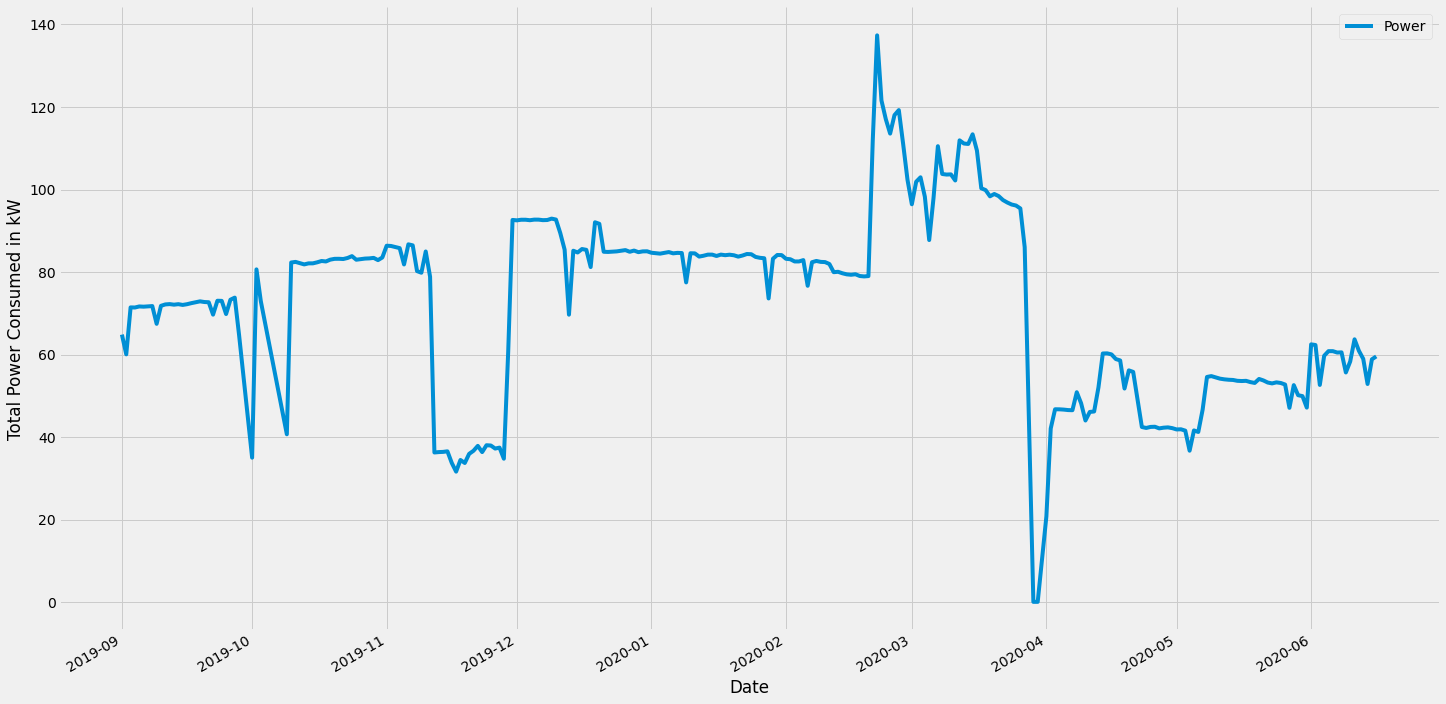

In [20]:
# plt.figure(figsize=(100,50))
# plt.plot_date(dat_2.Date, dat_2.Power, linestyle='solid', color='violet')
# plt.gcf().autofmt_xdate()
# plt.tight_layout()
# plt.grid(True)
df1=df.loc[:,['Date','Power']]
df1.set_index('Date',inplace=True)
df1.plot(figsize=(20,10))
plt.legend().set_visible(True)
plt.tight_layout()
sns.despine(top=True)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Power Consumed in kW')

# dat_1.plot()
plt.show()

Date
2019-09-01    64.850800
2019-09-02    62.379223
2019-09-03    65.602534
2019-09-04    67.204638
2019-09-05    68.220795
                ...    
2020-06-12    56.086890
2020-06-13    56.273610
2020-06-14    56.055112
2020-06-15    56.236062
2020-06-16    56.451118
Name: Power, Length: 281, dtype: float64

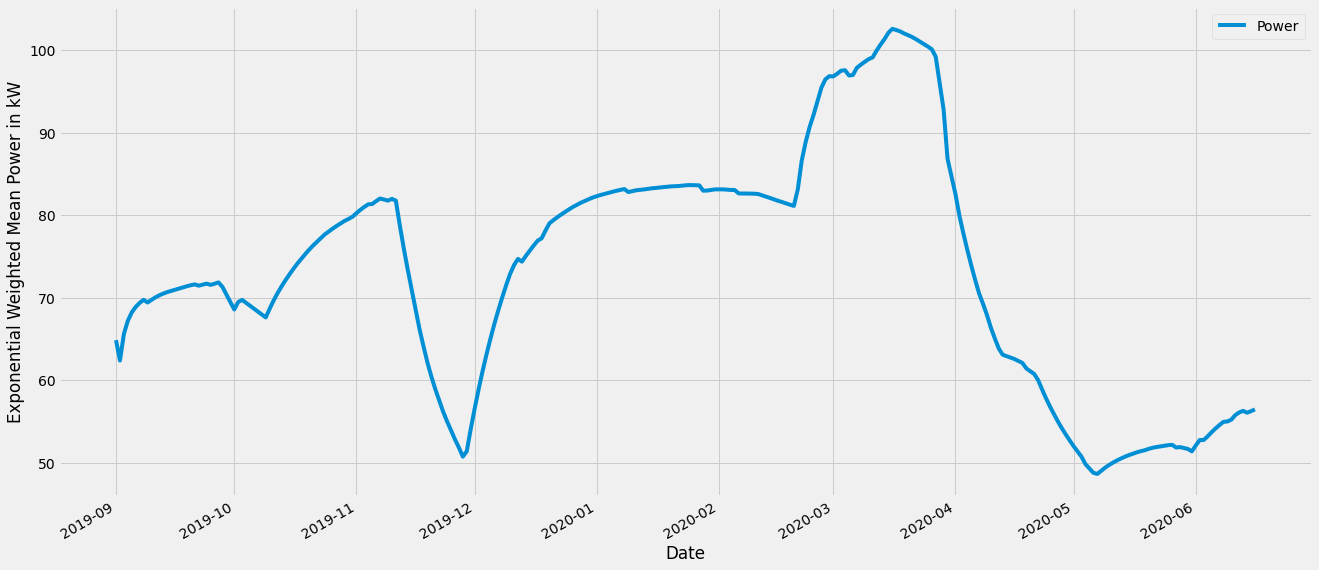

In [21]:
ewa=df1.Power.ewm(span=30,adjust=True).mean()
ewa.plot(figsize=(20,10))
plt.grid(True)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Exponential Weighted Mean Power in kW')
ewa

280          NaN
279          NaN
278          NaN
277          NaN
276          NaN
         ...    
4      55.336455
3      55.507125
2      55.481522
1      55.656766
0      55.854127
Name: Power, Length: 281, dtype: float64

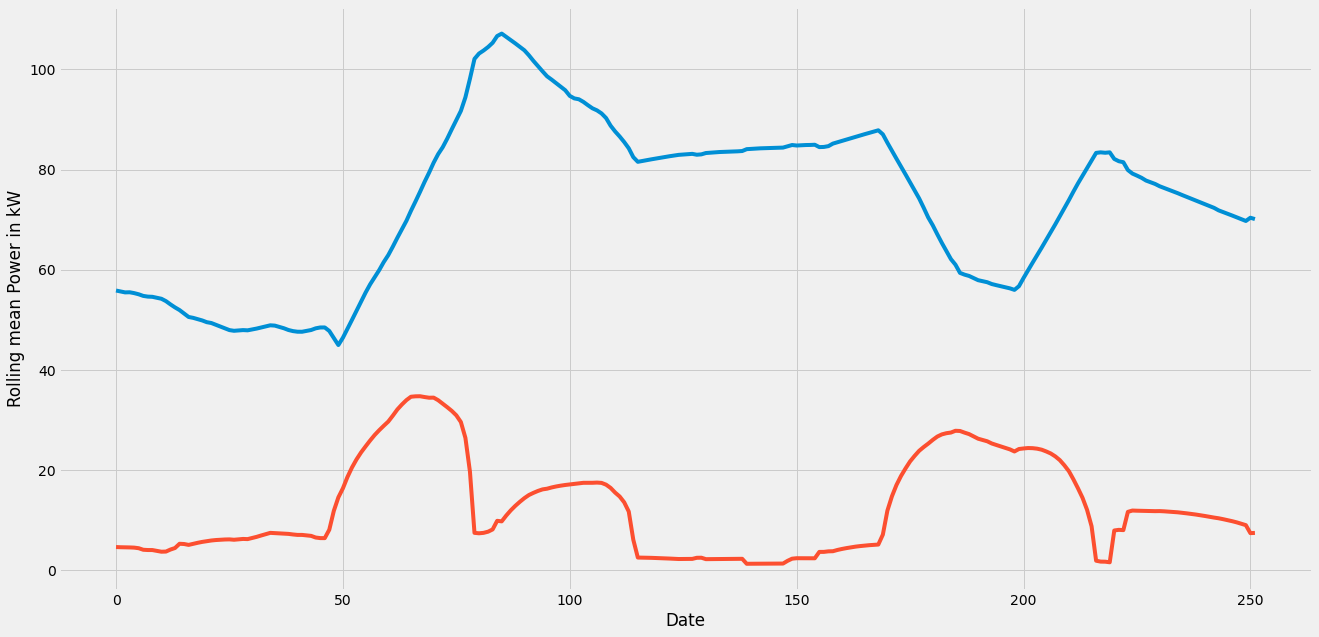

In [22]:
rolling_mean_plot(df, 30)

In [23]:
df2 = np.log(df1)

In [24]:
print("Rresuls of Dickey-Fuller Test")
dftest = adfuller(df2['Power'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'No. of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Rresuls of Dickey-Fuller Test
Test Statistic               -4.110875
p-value                       0.000929
#Lags used                    6.000000
No. of Observations used    274.000000
Critical Value (1%)          -3.454444
Critical Value (5%)          -2.872147
Critical Value (10%)         -2.572422
dtype: float64


In [25]:
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [26]:
first_diff = df1.Power - df1.Power.shift(1)
first_diff = first_diff.dropna(inplace = False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


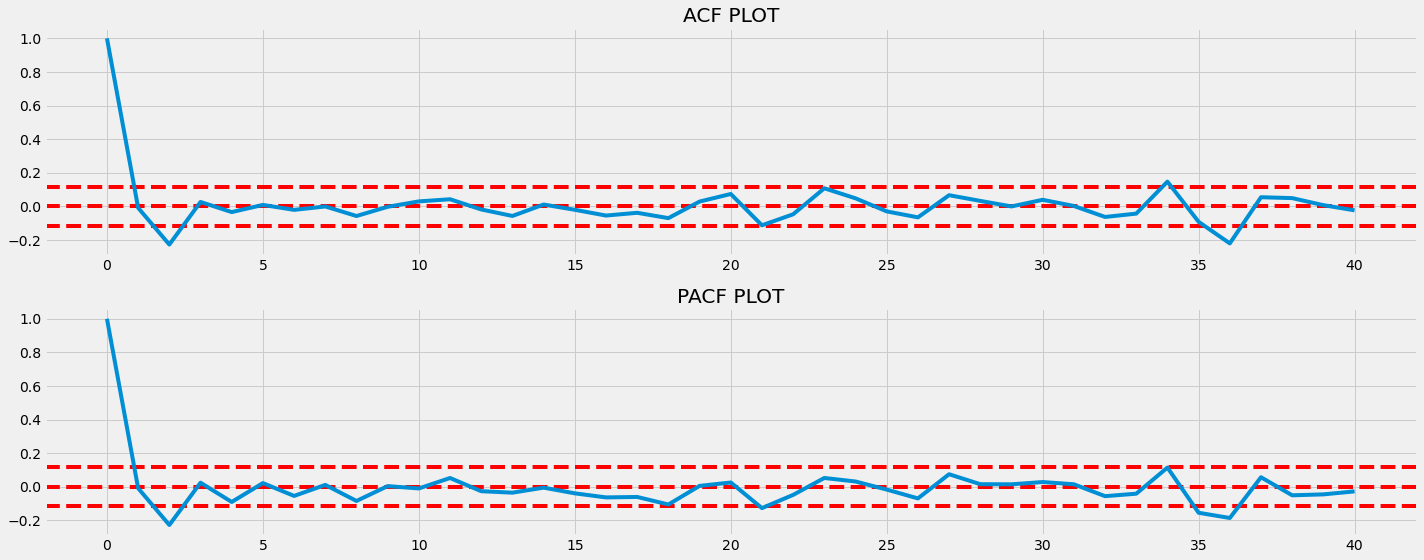

In [27]:
acf_data = acf(first_diff, nlags=40)
pacf_data = pacf(first_diff, nlags=40, method='ols')
# plt.figure(figsize=(20,8))

# ACF DATA PLOT
plt.subplot(2, 1, 1)
plt.title('ACF PLOT')
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=-1.96/np.sqrt(len(df1)), linestyle='--', color='r')
plt.axhline(y=1.96/np.sqrt(len(df1)), linestyle='--', color='r')
plt.plot(acf_data)

# PACF DATA PLOT
plt.subplot(2, 1, 2)
plt.title('PACF PLOT')
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=-1.96/np.sqrt(len(df1)), linestyle='--', color='r')
plt.axhline(y=1.96/np.sqrt(len(df1)), linestyle='--', color='r')
plt.plot(pacf_data)

plt.tight_layout()
plt.grid(True)

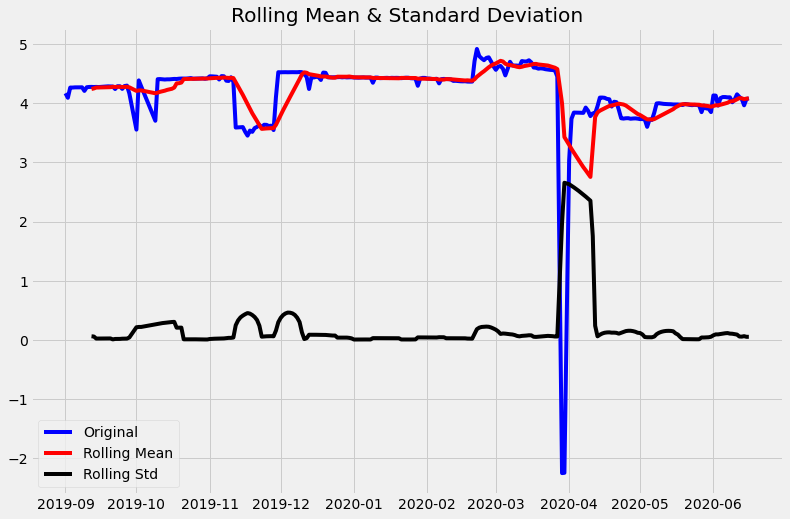

Results of Dickey-Fuller Test:
p-value = 0.0009. The series is likely stationary.
Test Statistic                  -4.110875
p-value                          0.000929
#Lags Used                       6.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64


In [28]:
test_stationarity(df2)

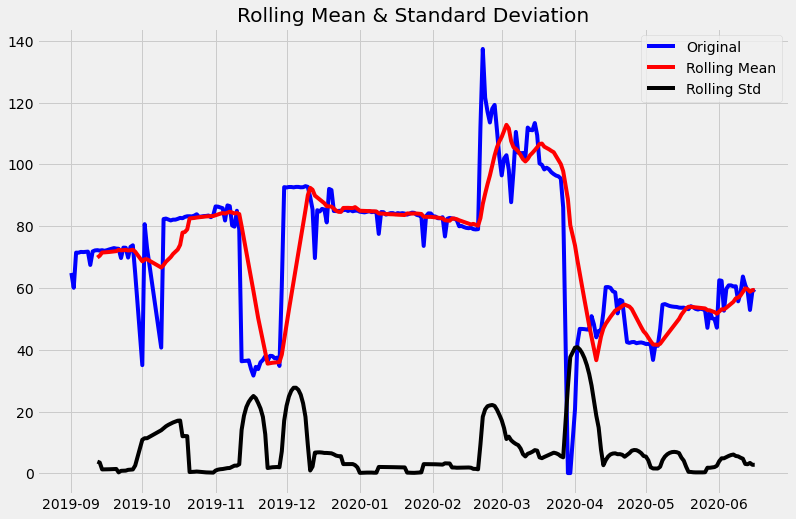

Results of Dickey-Fuller Test:
p-value = 0.0546. The series is likely non-stationary.
Test Statistic                  -2.826044
p-value                          0.054649
#Lags Used                       2.000000
Number of Observations Used    278.000000
Critical Value (1%)             -3.454094
Critical Value (5%)             -2.871993
Critical Value (10%)            -2.572340
dtype: float64


In [29]:
test_stationarity(df1)

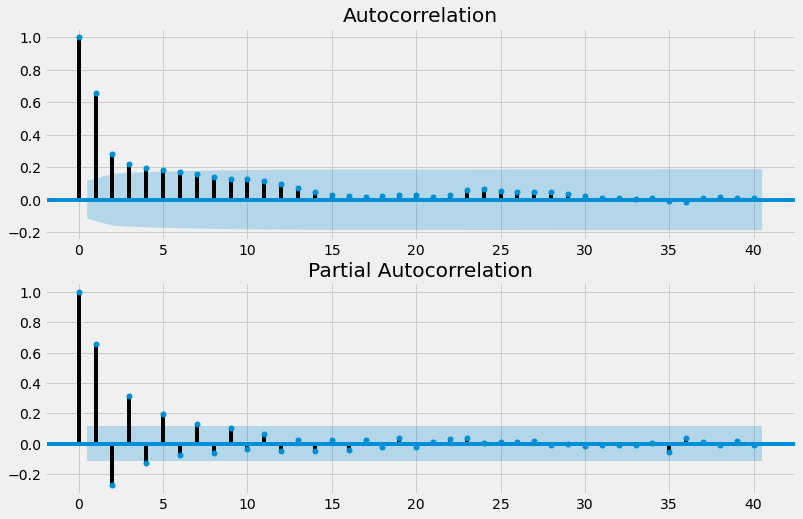

In [30]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2, lags=40, ax=ax2)

In [79]:
X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [88]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(30)[0]
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


# for t in range(10):
#     model = ARIMA(history, order=(5,1,2))
#     model_fit = model.fit(disp=0)
#     output = model_fit.predict()
#     yhat = output[0]
#     predictions.append(yhat)
#     history.append(yhat)
    

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=4.613204, expected=4.626841
predicted=4.603962, expected=4.717684
predicted=4.680971, expected=4.710809
predicted=4.665919, expected=4.709863
predicted=4.678892, expected=4.730716
predicted=4.695691, expected=4.695317
predicted=4.666504, expected=4.608197
predicted=4.599334, expected=4.603779
predicted=4.599008, expected=4.588572
predicted=4.575077, expected=4.594253
predicted=4.580083, expected=4.589128
predicted=4.571134, expected=4.579299
predicted=4.563844, expected=4.573134
predicted=4.558143, expected=4.568124
predicted=4.553218, expected=4.565590
predicted=4.550526, expected=4.558209
predicted=4.543699, expected=4.454831
predicted=4.457153, expected=-2.259526
predicted=-2.203995, expected=-2.254748
predicted=0.481164, expected=3.036127
predicted=3.177155, expected=3.740031
predicted=3.751752, expected=3.845053
predicted=3.760826, expected=3.844736
predicted=3.931896, expected=3.843332
predicted=3.893259, expected=3.840836
predicted=3.967309, expected=3.840118
predicted

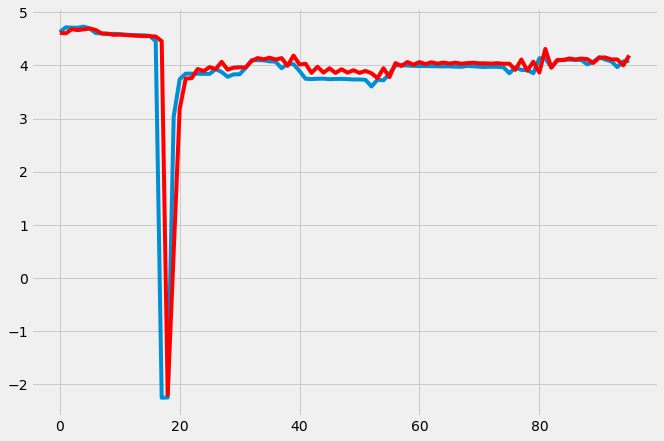

In [89]:
plt.figure(figsize=(10,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

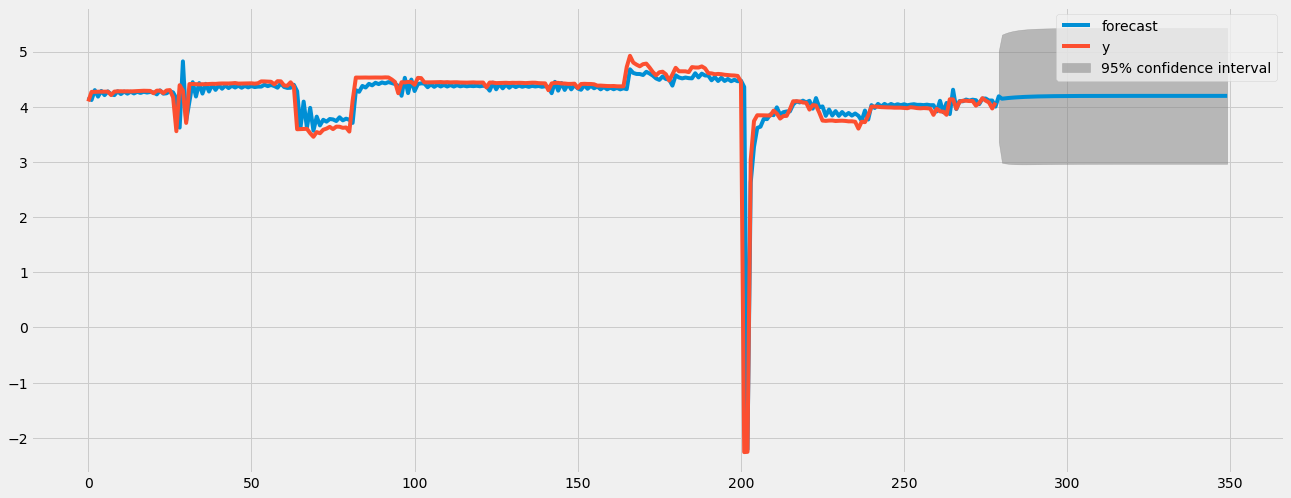

In [90]:
model_fit.plot_predict(1,350)
plt.show()

In [95]:
X = df2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
m = np.log(np.array([55.3,60.8,63.2,62.2,62.2,53.4,61.9,54.7,61.2,61.8,62.2,62.1,48.9,61.9,]))

In [96]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))
    
error = mean_squared_error(np.exp(test), np.exp(predictions))
print('Test MSE: %.3f' % error)


for t in range(len(m)):
    model = ARIMA(history, order=(1,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(m[t])
    print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(m[t])))

# k = np.hstack((test,m))
# plt.figure(figsize=(10,7))
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=100.806584, expected=102.190737
predicted=99.879282, expected=111.908760
predicted=107.874715, expected=111.142069
predicted=106.263163, expected=111.036900
predicted=107.650713, expected=113.376667
predicted=109.474424, expected=109.433514
predicted=106.325347, expected=100.303171
predicted=99.418074, expected=99.860957
predicted=99.385636, expected=98.353925
predicted=97.035482, expected=98.914200
predicted=97.522534, expected=98.408550
predicted=96.653606, expected=97.446071
predicted=95.951631, expected=96.847182
predicted=95.406115, expected=96.363200
predicted=94.937393, expected=96.119242
predicted=94.682234, expected=95.412414
predicted=94.037968, expected=86.041600
predicted=86.241611, expected=0.104400
predicted=0.110361, expected=0.104900
predicted=1.617957, expected=20.824436
predicted=23.978448, expected=42.099305
predicted=42.595645, expected=46.761171
predicted=42.983932, expected=46.746350
predicted=51.003602, expected=46.680743
predicted=49.070536, expected=4

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


predicted=62.811485, expected=63.200000
predicted=63.173323, expected=62.200000
predicted=62.387625, expected=62.200000
predicted=63.312134, expected=53.400000
predicted=53.883396, expected=61.900000
predicted=70.488946, expected=54.700000
predicted=49.972076, expected=61.200000
predicted=73.947219, expected=61.800000
predicted=53.978170, expected=62.200000
predicted=71.107946, expected=62.100000
predicted=56.569254, expected=48.900000
predicted=54.262506, expected=61.900000


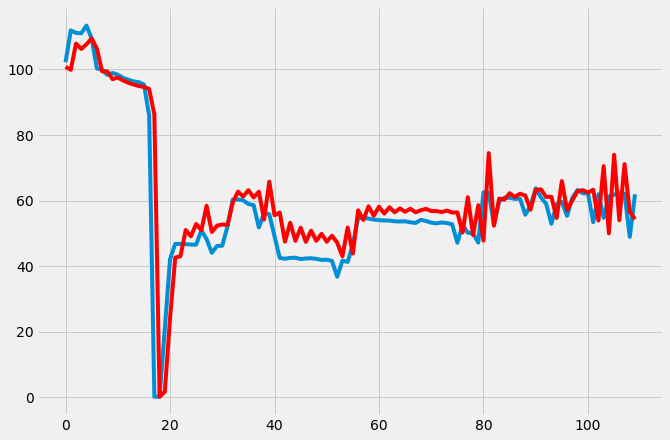

[[57.07128491]
 [60.01675017]
 [62.81148459]
 [63.17332252]
 [62.38762505]
 [63.31213376]
 [53.88339587]
 [70.48894616]
 [49.97207598]
 [73.94721873]
 [53.97817005]
 [71.10794571]
 [56.56925374]
 [54.26250589]]


In [97]:
m = np.array(m)
m = m.reshape((-1,1))
k = np.vstack((test,m))
plt.figure(figsize=(10,7))
plt.plot(np.exp(k))
plt.plot(np.exp(predictions), color='red')
plt.show()
# model_fit.plot_predict(1,500)
# plt.show()
print(np.exp(predictions[-14:]))

In [98]:
shift = df1 - df1.shift()

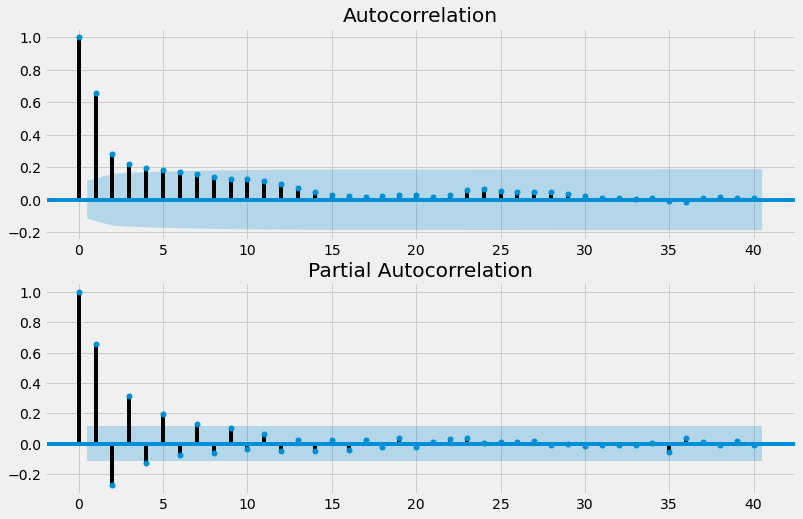

In [99]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2, lags=40, ax=ax2)

In [85]:
df3 = np.sqrt(df1)
shift = df2 - df2.shift()

In [78]:
test_stationarity(df3)

0.10439999999999999

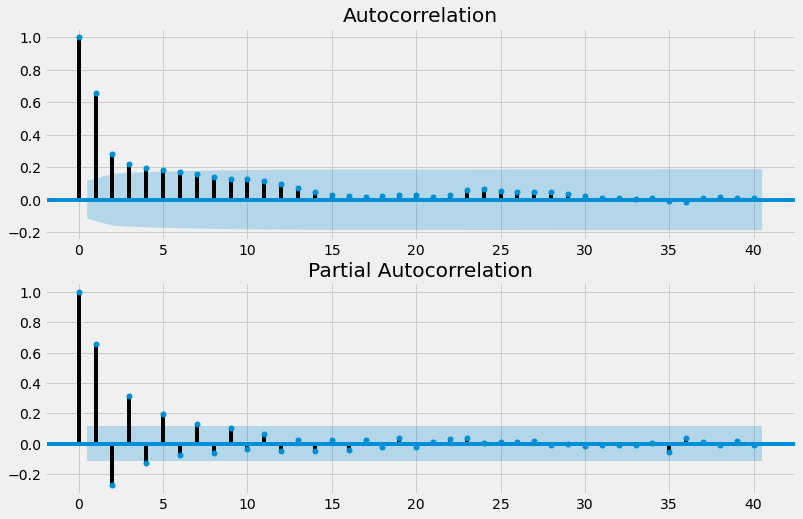

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2, lags=40, ax=ax2)

In [61]:
history = []
X = df2.Power.values
mod = ARIMA(df2, order=(1,0,2))
mod_fit = mod.fit(disp=1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<Figure size 1440x576 with 0 Axes>

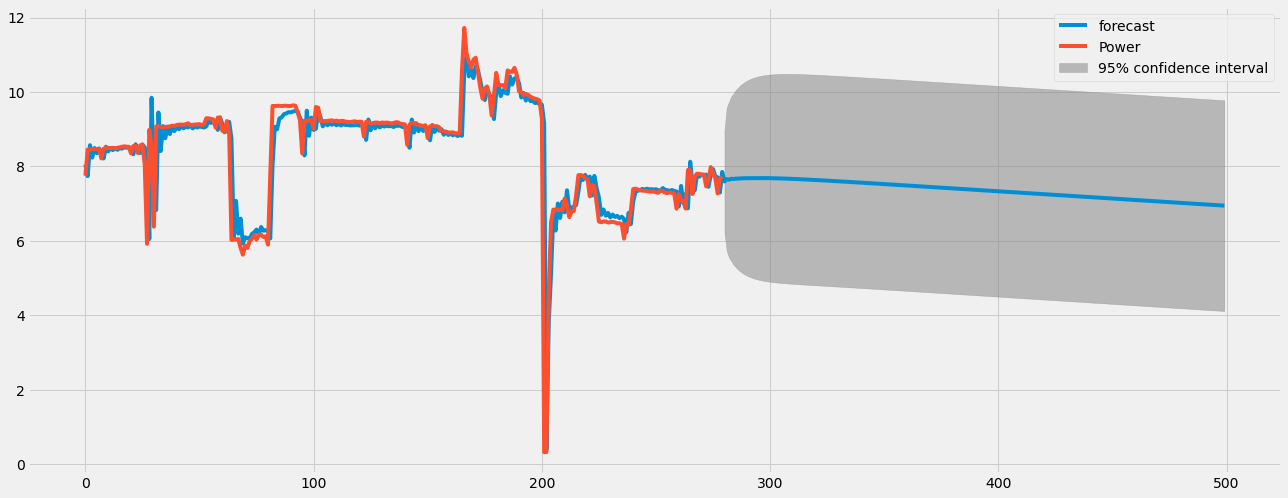

In [67]:
plt.figure(figsize=(20,8))
# fig, ax = plt.subplots()
# mod_fit.plot_predict('2019-09-01','2020-06-16')
mod_fit.plot_predict(1,500)
plt.show()

In [63]:
print(mod_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Power   No. Observations:                  280
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -297.279
Method:                       css-mle   S.D. of innovations              0.696
Date:                Fri, 03 Jul 2020   AIC                            612.558
Time:                        23:21:50   BIC                            645.271
Sample:                             1   HQIC                           625.679
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0039      0.004     -0.867      0.386      -0.013       0.005
ar.L1.D.Power     0.2452      0.492      0.498      0.618      -0.720       1.210
ar.L2.D.Power     0.6370      0.451     

In [65]:
(mod_fit.forecast(10)[0])**2

array([57.69337001, 58.61290175, 58.41830289, 58.80369795, 58.67367644,
       58.88058648, 58.84141268, 58.95669668, 58.95296126, 59.01848605])

In [ ]:
#change
x_pred = pd.date_range(start='17/6/2020', periods=150)
y_pred = np.exp(model_fit.forecast(150)[0])
x_true = pd.date_range(start='17/6/2020', periods=14)
y_true = np.array([55.3,60.8,63.2,62.2,62.2,53.4,61.9,54.7,61.2,61.8,62.2,62.1,48.9,61.9,])
# y_true = np.exp(test[0:96])
plt.plot(x_pred, y_pred)
plt.plot(x_true, y_true, color="red", linestyle="--")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
residuals = pd.DataFrame(mod_fit.resid)
residuals

In [ ]:
residuals.plot()

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

In [ ]:
# Import the library 
from pmdarima import auto_arima 

model_auto = auto_arima(train, start_p = 0, start_q = 0, 
                          max_p = 4, max_q = 4, m = 12, 
                          start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 

In [ ]:
fit = model_auto.fit(train)
forecast = fit.predict(n_periods=96)
plt.plot(np.exp(forecast))
plt.plot(np.exp(test))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3, model='additive', period=1)

In [ ]:
result.plot()
plt.show()